In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, fbeta_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Charger dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Créer et entraîner un réseau de neurones
mlp = MLPClassifier(
    hidden_layer_sizes=(10),  # 2 couches : 64 et 32 neurones
    activation="relu",            # ReLU dans hidden layers
    solver="adam",                # algorithme d'optimisation
    alpha=0.001,                  # régularisation
    max_iter=1000,                # plus d’itérations pour convergence
    random_state=42,
    early_stopping=False           # arrête si surapprentissage
)

/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


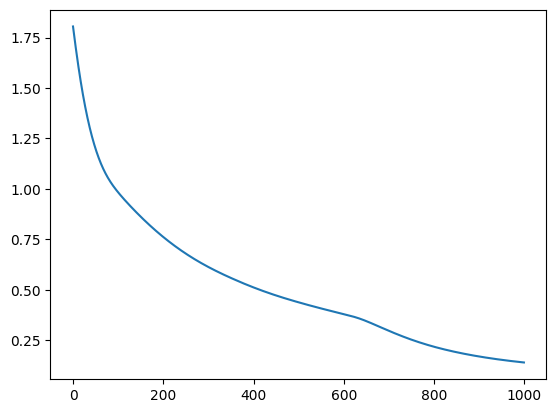

In [63]:
mlp.fit(X_train, y_train)

plt.plot(mlp.loss_curve_)

In [64]:
# Prédictions et score
y_pred = mlp.predict(X_test)
print("Accuracy NN:", accuracy_score(y_test, y_pred))

Accuracy NN: 0.9777777777777777


In [65]:
print(classification_report(y_test, y_pred))

f2 = fbeta_score(y_test, y_pred, beta=2, average="macro")
print("F2-score (macro):", f2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

F2-score (macro): 0.9741161616161617


In [66]:
acc_train = accuracy_score(y_train, mlp.predict(X_train))
acc_test = accuracy_score(y_test, mlp.predict(X_test))

print("Accuracy train:", acc_train)
print("Accuracy test :", acc_test)

# F1 et F2 (macro moyenne des classes)
f1_train = f1_score(y_train, mlp.predict(X_train), average="macro")
f1_test = f1_score(y_test, mlp.predict(X_test), average="macro")

f2_train = fbeta_score(y_train, mlp.predict(X_train), beta=2, average="macro")
f2_test = fbeta_score(y_test, mlp.predict(X_test), beta=2, average="macro")

print("F1 train:", f1_train, "| F1 test:", f1_test)
print("F2 train:", f2_train, "| F2 test:", f2_test)

Accuracy train: 0.9809523809523809
Accuracy test : 0.9777777777777777
F1 train: 0.9819688109161794 | F1 test: 0.974320987654321
F2 train: 0.9818629886132296 | F2 test: 0.9741161616161617


In [67]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 macro
scores_f1 = cross_val_score(mlp, X, y, cv=cv, scoring="f1_macro")
print("F1 (CV) mean:", scores_f1.mean(), "±", scores_f1.std())

# F2 macro
from sklearn.metrics import make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2, average="macro")
scores_f2 = cross_val_score(mlp, X, y, cv=cv, scoring=f2_scorer)
print("F2 (CV) mean:", scores_f2.mean(), "±", scores_f2.std())

/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/ne

F1 (CV) mean: 0.9728562668393064 ± 0.03974527044802337


/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


F2 (CV) mean: 0.972455772085363 ± 0.040388322171141716


/home/owen/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


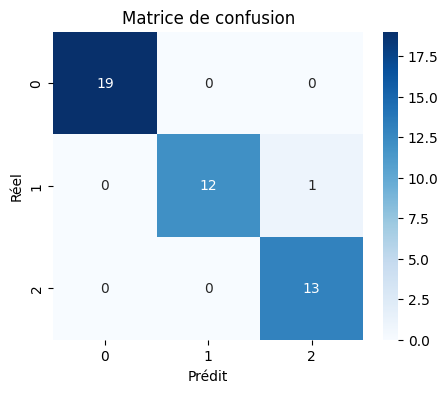

In [68]:

cm = confusion_matrix(y_test, mlp.predict(X_test))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()